1. **IMPORTING PYTHON LIBRARIES**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
#IMPORTING THE CSV FILE as df
df=pd.read_csv(r'iris.csv',encoding='unicode_escape')

2. **PERFORMING BASIC EDA**

In [23]:
# gives the number of rows and columns present in the dataframe df
df.shape

(150, 5)

In [24]:
#To list the names of the columns in dataframe df
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [25]:
#To show the first five records in the dataframe df
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [26]:
#To show the number of null values present in each column
pd.isnull(df).sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [27]:
#To show the information about each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [29]:
dup_data = df.drop_duplicates(subset ='variety') 
dup_data
#Only the first occurrence of each unique value in the 'variety' column is retained, and all subsequent duplicate rows are dropped.

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [40]:
for species in df['variety'].unique():
    mean_length = df.loc[df['variety'] == species, 'petal.length'].mean()
    print(f"The mean petal length for {species} is {mean_length:.2f}")

The mean petal length for Setosa is 1.46
The mean petal length for Versicolor is 4.26
The mean petal length for Virginica is 5.55


2. **VISUALIZING KEY STATISTICS**

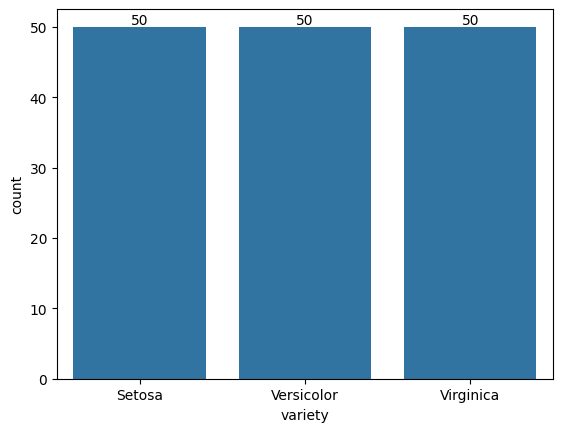

In [30]:
ax=sns.countplot(x='variety',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

CONCLUSION:
There are equal number of flowers of each variety.

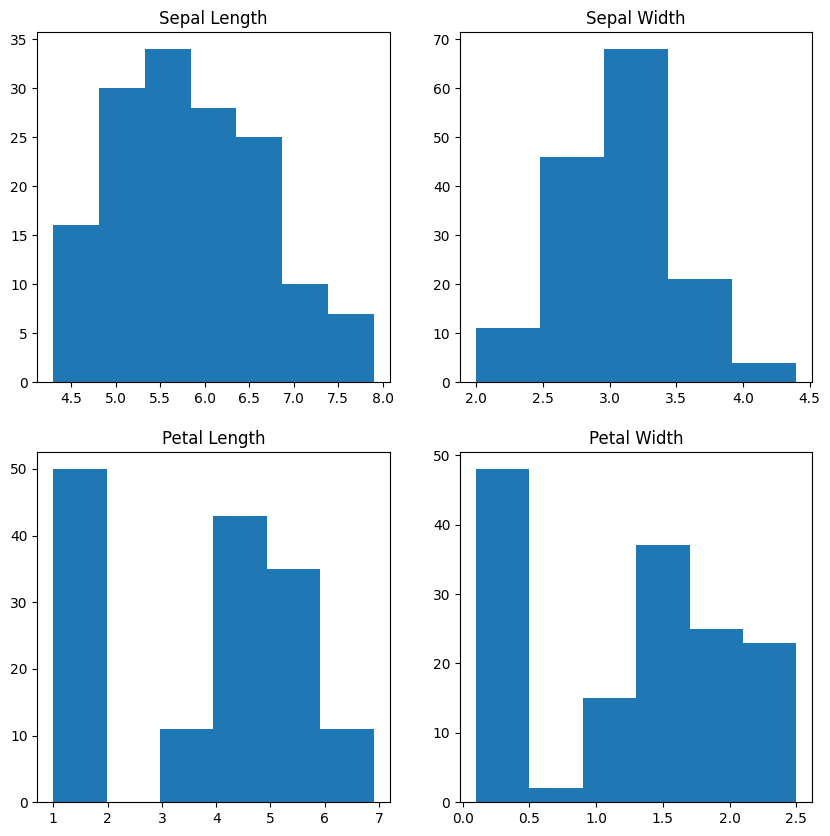

In [31]:
fig,axes = plt.subplots(2, 2, figsize=(10,10)) 

axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(df['sepal.length'], bins=7) 

axes[0,1].set_title('Sepal Width') 
axes[0,1].hist(df['sepal.width'], bins=5); 

axes[1,0].set_title('Petal Length') 
axes[1,0].hist(df['petal.length'], bins=6); 

axes[1,1].set_title('Petal Width') 
axes[1,1].hist(df['petal.width'], bins=6);


In [32]:
df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].corr(method='pearson')


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


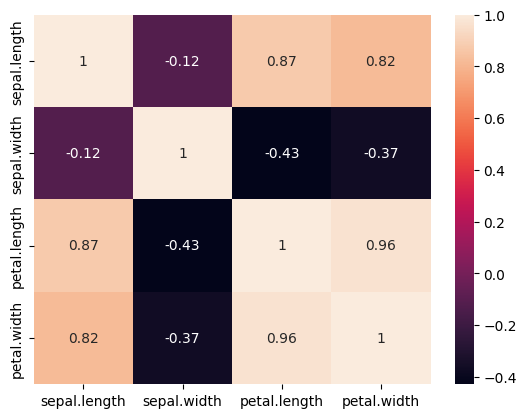

In [33]:
sns.heatmap(df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].corr(method='pearson'), 
            annot = True); 
  
plt.show()

CONCLUSION: 
1. The strongest correlation in the dataset is between Petal Length and Petal Width, suggesting that these two dimensions of the petals are highly interrelated and tend to increase together.

2. The high positive correlation between Sepal Length and Petal Length suggests that flowers with longer sepals also have longer petals.

3. There is also a strong positive correlation between Sepal Length and Petal Width, indicating that flowers with longer sepals tend to have wider petals as well.

4. Sepal Width has a moderate negative correlation with both Petal Length and Petal Width . This means that flowers with wider sepals tend to have shorter and narrower petals.


<Axes: xlabel='sepal.width'>

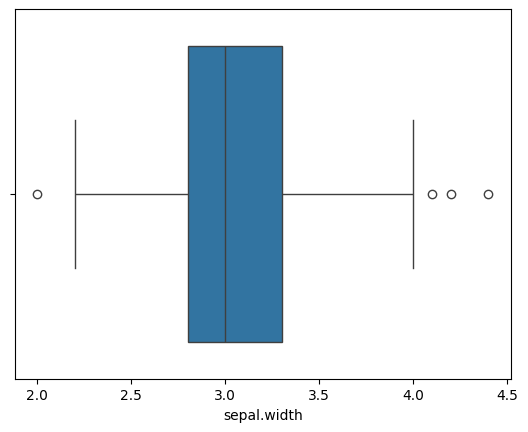

In [34]:
sns.boxplot(x='sepal.width', data=df)

CONCLUSION: The sepal length lies in the range of 2.7 to 3.3

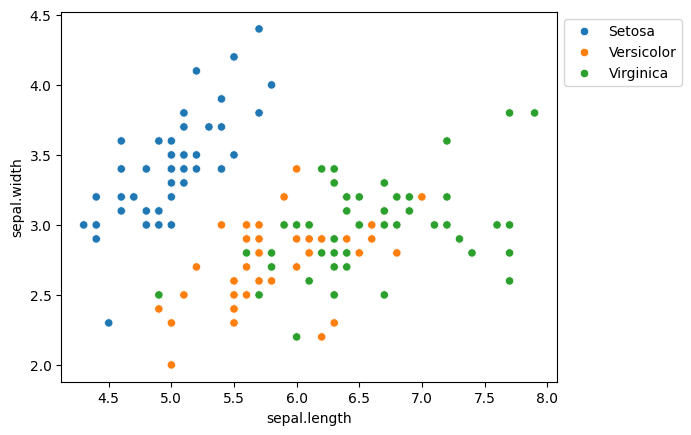

In [42]:
sns.scatterplot(x='sepal.length', y='sepal.width', 
                hue='variety', data=df, ) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

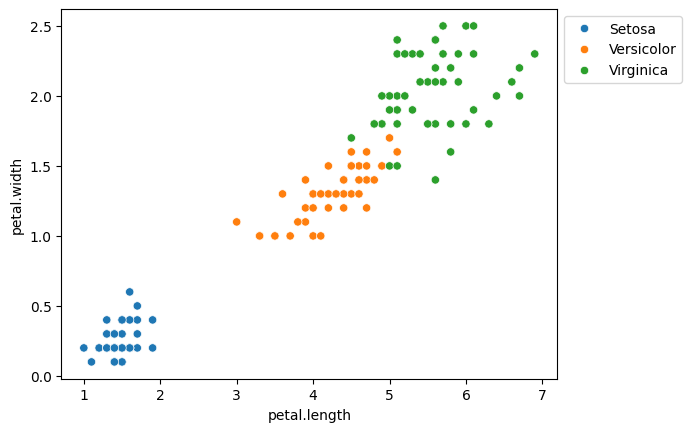

In [39]:
sns.scatterplot(x='petal.length', y='petal.width', 
                hue='variety', data=df, ) 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()